# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities[55]

Number of cities in the list: 577


'smithers'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
     
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,                           
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yarmouth
Processing Record 2 of Set 1 | kalashnikovo
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | hobyo
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | uusikaupunki
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | rongelap
Processing Record 10 of Set 1 | severnoye
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | emerald
Processing Record 15 of Set 1 | sur
Processing Record 16 of Set 1 | thames
Processing Record 17 of Set 1 | kittila
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | zorritos
Processing Record 20 of Set 1 | san luis
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | jamestown
Processi

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yarmouth,41.7057,-70.2286,18.34,93,100,3.09,US,1686714786
1,kalashnikovo,57.2824,35.2262,14.33,59,0,0.32,RU,1686714786
2,hami,42.8000,93.4500,36.19,7,81,2.07,CN,1686714786
3,hobyo,5.3505,48.5268,26.10,82,96,8.93,SO,1686714786
4,adamstown,-25.0660,-130.1015,20.10,72,18,0.66,PN,1686714786


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yarmouth,41.7057,-70.2286,18.34,93,100,3.09,US,1686714786
1,kalashnikovo,57.2824,35.2262,14.33,59,0,0.32,RU,1686714786
2,hami,42.8000,93.4500,36.19,7,81,2.07,CN,1686714786
3,hobyo,5.3505,48.5268,26.10,82,96,8.93,SO,1686714786
4,adamstown,-25.0660,-130.1015,20.10,72,18,0.66,PN,1686714786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

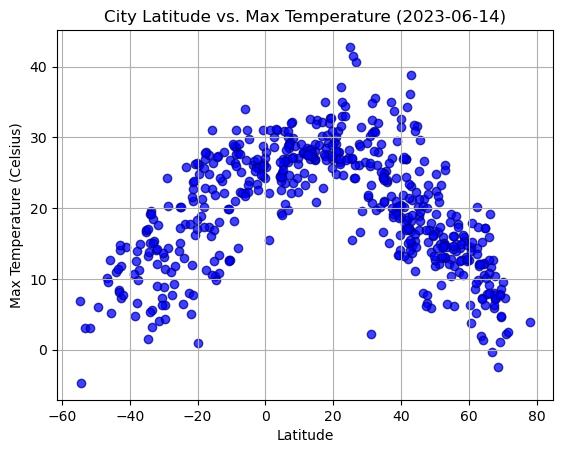

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", edgecolors="darkblue",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

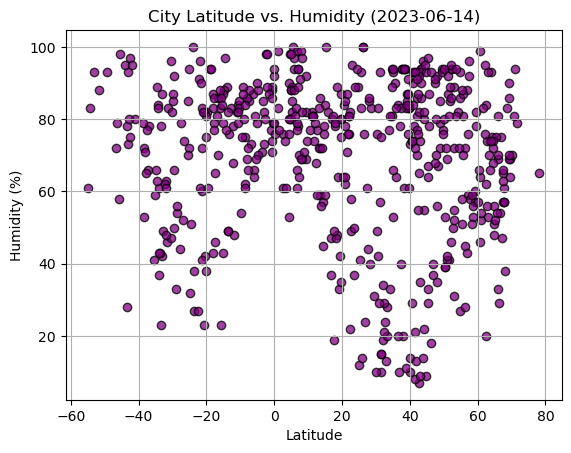

In [7]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="purple", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

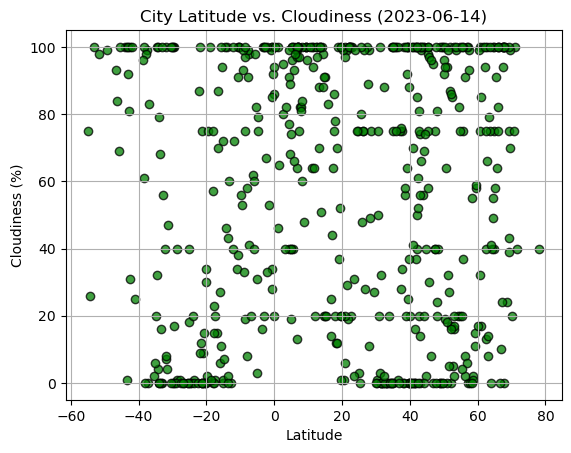

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="green", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

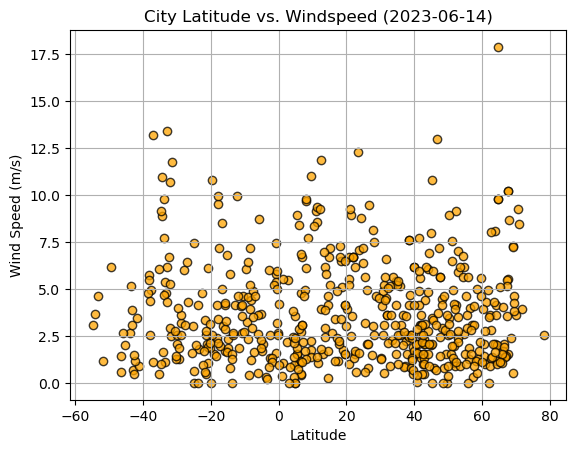

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="orange", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def liner_regression(x_value, y_value, x_label, y_label, annotate_cordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value,edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_value,regress_values,"r-") # plotting the line
    plt.annotate(line_eq,annotate_cordinates,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
      # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_value,y_value)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [10]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yarmouth,41.7057,-70.2286,18.34,93,100,3.09,US,1686714786
1,kalashnikovo,57.2824,35.2262,14.33,59,0,0.32,RU,1686714786
2,hami,42.8000,93.4500,36.19,7,81,2.07,CN,1686714786
3,hobyo,5.3505,48.5268,26.10,82,96,8.93,SO,1686714786
4,adamstown,-25.0660,-130.1015,20.10,72,18,0.66,PN,1686714786


In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yarmouth,41.7057,-70.2286,18.34,93,100,3.09,US,1686714786
1,kalashnikovo,57.2824,35.2262,14.33,59,0,0.32,RU,1686714786
2,hami,42.8000,93.4500,36.19,7,81,2.07,CN,1686714786
3,hobyo,5.3505,48.5268,26.10,82,96,8.93,SO,1686714786
5,uusikaupunki,60.8004,21.4084,13.95,64,32,1.03,FI,1686714787


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <  0, :])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,20.10,72,18,0.66,PN,1686714786
7,edinburgh of the seven seas,-37.0676,-12.3116,14.94,78,83,13.21,SH,1686714787
10,east london,-33.0153,27.9116,18.52,42,0,6.17,ZA,1686714787
11,blackmans bay,-43.0167,147.3167,14.07,73,92,0.67,AU,1686714787
12,port-aux-francais,-49.3500,70.2167,6.08,93,99,6.16,TF,1686714787


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.553461887213696
The correlation between both factors is -0.74


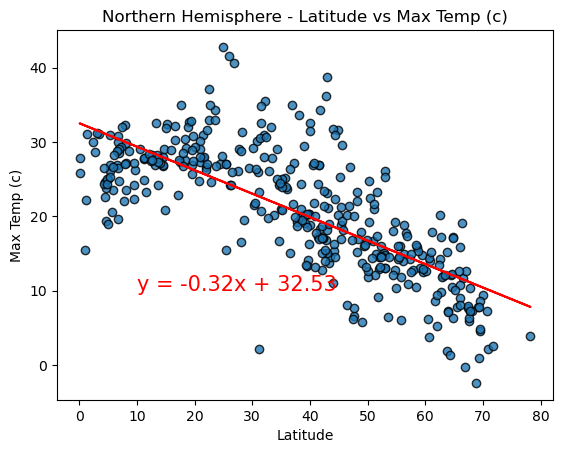

In [33]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
xvalues_N= northern_hemi_df["Lat"]
yvalues_N = northern_hemi_df["Max Temp"]

liner_regression(xvalues_N, yvalues_N, "Latitude", "Max Temp (c)", (10,10))
plt.title("Northern Hemisphere - Latitude vs Max Temp (c)")
plt.savefig("output_data/LR_Latitude_VS_ Temp_Norther Hemi_final.png")

plt.show()

The r-squared is: 0.5390202881868774
The correlation between both factors is 0.73


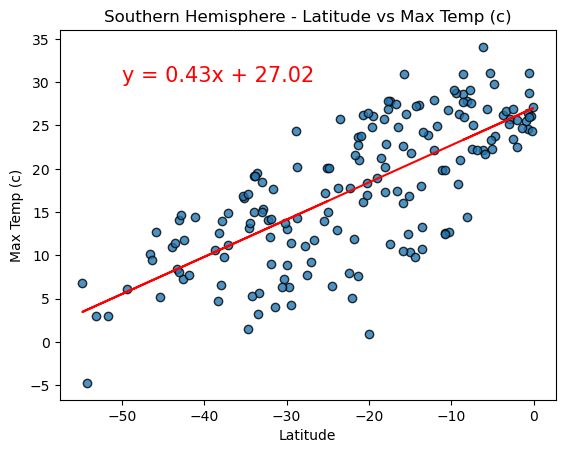

In [34]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
xvalues_S= southern_hemi_df["Lat"]
yvalues_S = southern_hemi_df["Max Temp"]

liner_regression(xvalues_S, yvalues_S, "Latitude", "Max Temp (c)",(-50,30))

plt.savefig("output_data/LR_Latitude_VS_ Temp_Southern Hemisphere.png")
plt.title("Southern Hemisphere - Latitude vs Max Temp (c)")
plt.title
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between latitude and maximum temperature is strong for both the hemispheres, indicating that as we move closer to the equator ( x axis value = 0), the temperature is higher and as we move away it drops .

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.014724238125662795
The correlation between both factors is -0.12


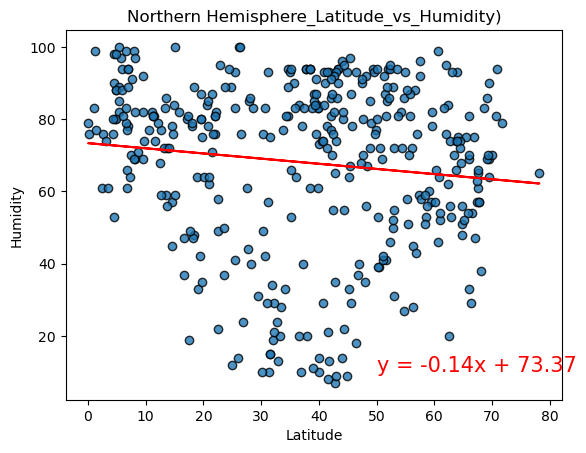

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
xvalues_N_LvsH= northern_hemi_df["Lat"]
yvalues_n_LvsH = northern_hemi_df["Humidity"]

liner_regression(xvalues_N_LvsH, yvalues_n_LvsH, "Latitude", "Humidity",(50,10))

plt.savefig("output_data/LR_Latitude_VS_Humidity_Northern_Hemisphere.png")
plt.title("Northern Hemisphere_Latitude_vs_Humidity)")

plt.show()

The r-squared is: 0.026786955013163204
The correlation between both factors is 0.16


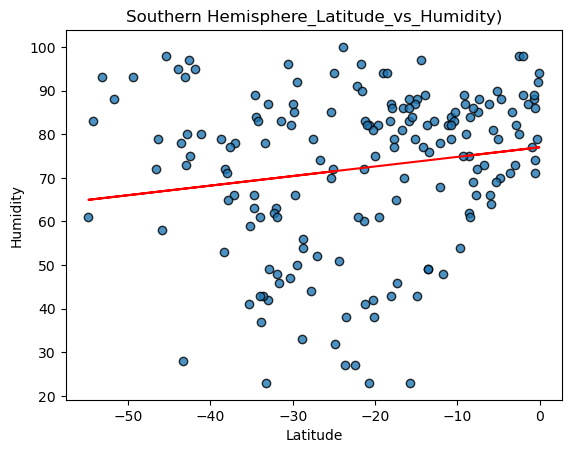

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
xvalues_S_LvsH= southern_hemi_df["Lat"]
yvalues_S_LvsH = southern_hemi_df["Humidity"]

liner_regression(xvalues_S_LvsH, yvalues_S_LvsH, "Latitude", "Humidity",(-50,10))

plt.savefig("output_data/LR_Latitude_VS_Humidity_Southern_Hemisphere.png")
plt.title("Southern Hemisphere_Latitude_vs_Humidity)")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between Latitude and Humidity appear to be quite weak due to the small r-value and the co relation is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.020865648288501893
The correlation between both factors is -0.14


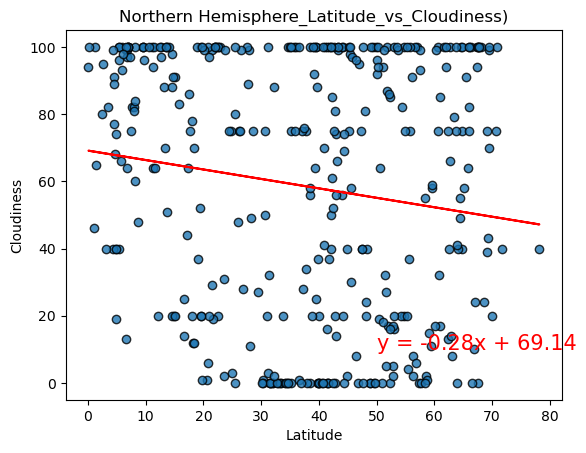

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
xvalues_N_LvsC= northern_hemi_df["Lat"]
yvalues_n_LvsC = northern_hemi_df["Cloudiness"]

liner_regression(xvalues_N_LvsC, yvalues_n_LvsC, "Latitude", "Cloudiness",(50,10))

plt.savefig("output_data/LR_Latitude_VS_Cloudiness_Northern_Hemisphere.png")
plt.title("Northern Hemisphere_Latitude_vs_Cloudiness)")

plt.show()


The r-squared is: 0.000686360983147009
The correlation between both factors is 0.03


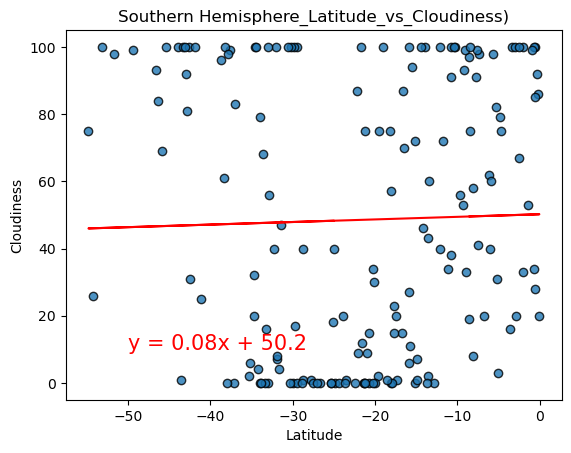

In [39]:
# Southern Hemisphere
# YOUR CODE HERE

xvalues_S_LvsC= southern_hemi_df["Lat"]
yvalues_S_LvsC = southern_hemi_df["Cloudiness"]

liner_regression(xvalues_S_LvsC, yvalues_S_LvsC, "Latitude", "Cloudiness",(-50,10))

plt.savefig("output_data/LR_Latitude_VS_Cloudiness_Southern_Hemisphere.png")
plt.title("Southern Hemisphere_Latitude_vs_Cloudiness)")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between Latitude and Cloudiness appear to be quite weak due to the small r-value and the co relation is very weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0005515360316488108
The correlation between both factors is -0.02


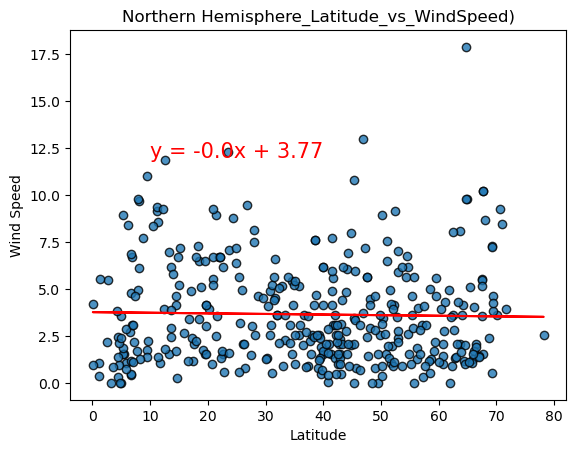

In [40]:
# Northern Hemisphere
# YOUR CODE HERE

xvalues_N_LvsW= northern_hemi_df["Lat"]
yvalues_n_LvsW = northern_hemi_df["Wind Speed"]

liner_regression(xvalues_N_LvsW, yvalues_n_LvsW, "Latitude", "Wind Speed",(10,12))

plt.savefig("output_data/LR_Latitude_VS_WindSpeed_Northern_Hemisphere.png")
plt.title("Northern Hemisphere_Latitude_vs_WindSpeed)")

plt.show()

The r-squared is: 0.004276550820367912
The correlation between both factors is -0.07


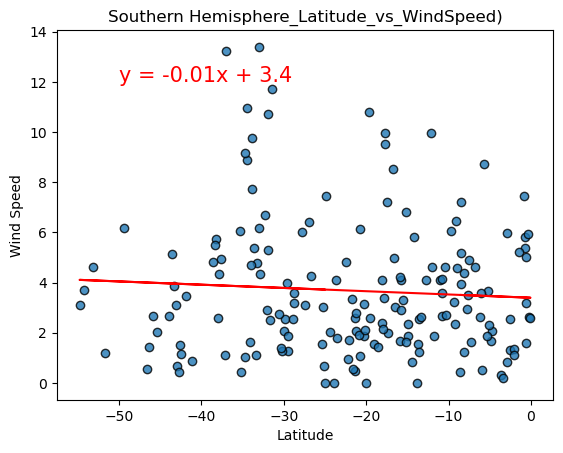

In [41]:
# Southern Hemisphere
# YOUR CODE HERE

xvalues_S_LvsW= southern_hemi_df["Lat"]
yvalues_S_LvsW = southern_hemi_df["Wind Speed"]

liner_regression(xvalues_S_LvsW, yvalues_S_LvsW, "Latitude", "Wind Speed",(-50,12))

plt.savefig("output_data/LR_Latitude_VS_WindSpeed_Southern_Hemisphere.png")
plt.title("Southern Hemisphere_Latitude_vs_WindSpeed)")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.